In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("spam.csv")

In [ ]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
2849,ham,She's fine. Good to hear from you. How are you...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[['v1','v2']]

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

v1    0
v2    1
dtype: int64

In [ ]:
df.isnull().any(axis = 1)

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [ ]:
df[df.isnull().any(axis = 1)]

,v1,v2
3035,ham,NaN


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
df.describe()

,v1,v2
count,5571,5571
unique,2,5163
top,ham,"Sorry, I'll call later"
freq,4824,30


In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)

In [ ]:
df.sample(5)

,target,text
3579,ham,Have a lovely night and when you wake up to se...
2850,ham,Are you going to wipro interview today?
5397,ham,That's necessarily respectful
4670,ham,"Probably not, I'm almost out of gas and I get ..."
4137,ham,"Good! No, don���t need any receipts���well don..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df[['target']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.duplicated().sum()

408

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
df.shape

(5163, 2)

In [ ]:
df['target'].value_counts()

0    4510
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

[]

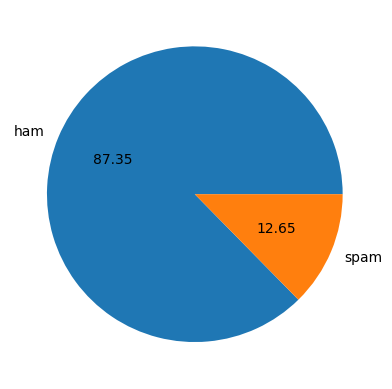

In [ ]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.plot()

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['text'].apply(len)

In [ ]:
# number of words

df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5163, dtype: int64

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.sample()

,target,text,num_characters,num_words,num_sentences
1245,0,Hello which the site to download songs its urg...,53,10,1


In [ ]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000,5163.000000
mean,0.126477,77.383498,17.949448,1.944218
std,0.332418,57.130981,12.802888,1.355741
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,35.000000,9.000000,1.000000
50%,0.000000,59.000000,14.000000,1.000000
75%,0.000000,114.000000,26.000000,2.000000
max,1.000000,910.000000,196.000000,18.000000


In [ ]:
df[df['target'] == 0][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4510.000000,4510.000000,4510.000000
mean,68.688248,16.542129,1.794457
std,54.838171,12.839089,1.266669
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,51.000000,13.000000,1.000000
75%,88.000000,21.000000,2.000000
max,910.000000,196.000000,18.000000


In [ ]:
df[df['target'] == 1][['num_characters','num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.437979,27.669219,2.978560
std,30.154681,7.030450,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

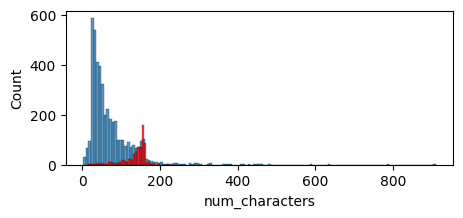

In [ ]:
plt.figure(figsize = (5,2))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

(array([ 1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  3.,  0.,  1.,  1.,
         3.,  1.,  1.,  4.,  2.,  2.,  0.,  0.,  1.,  0.,  1.,  3.,  1.,
         4.,  4.,  6.,  3.,  1.,  1.,  5.,  2.,  3.,  0.,  5.,  1.,  0.,
         4.,  4.,  6.,  3.,  4.,  6.,  5.,  5.,  4.,  9.,  1., 10.,  9.,
         5.,  8.,  5., 10., 11., 13., 22., 16., 25., 20., 22., 27., 28.,
        16., 45., 45., 62., 59., 52.,  6.,  8.,  1.,  1.,  2.,  2.,  2.,
         1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 13. ,  15.1,  17.2,  19.3,  21.4,  23.5,  25.6,  27.7,  29.8,
         31.9,  34. ,  36.1,  38.2,  40.3,  42.4,  44.5,  46.6,  48.7,
         50.8,  52.9,  55. ,  57.1,  59.2,  61.3,  63.4,  65.5,  67.6,
         69.7,  71.8,  73.9,  76. ,  78.1,  80.2,  82.3,  84.4,  86.5,
         88.6,  90.7,  92.8,  94.9,  97. ,  99.1, 101.2, 103.3, 105.4,
        107.5, 109.6, 111.7, 113.8, 115.9, 118. , 120.1, 122.2, 124.3,
        

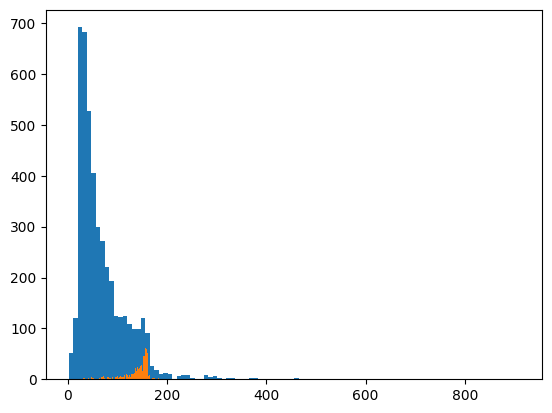

In [ ]:
plt.hist(df[df['target'] == 0]['num_characters'], bins = 100)
plt.hist(df[df['target'] == 1]['num_characters'], bins = 100)

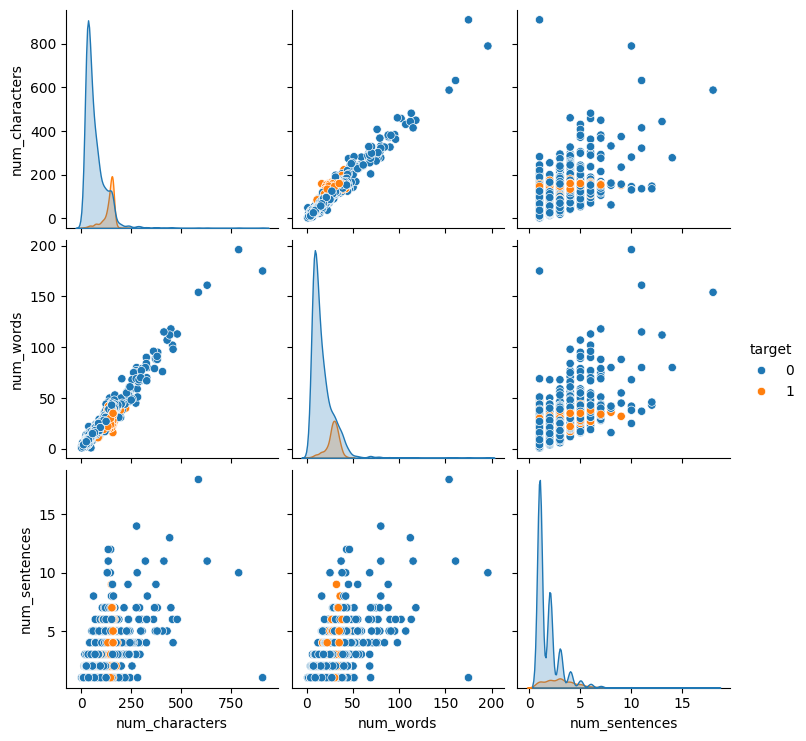

In [ ]:
sns.pairplot(df, hue='target')

<ipython-input-43-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

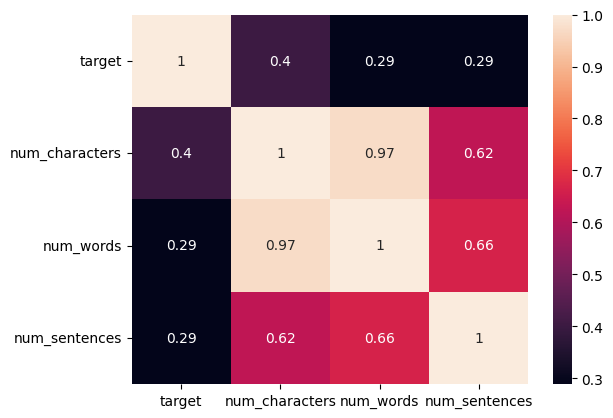

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

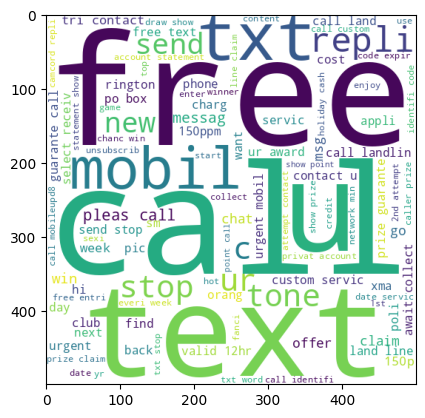

In [ ]:
plt.imshow(spam_wc)

In [ ]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)



In [ ]:
len(spam_corpus)

9938

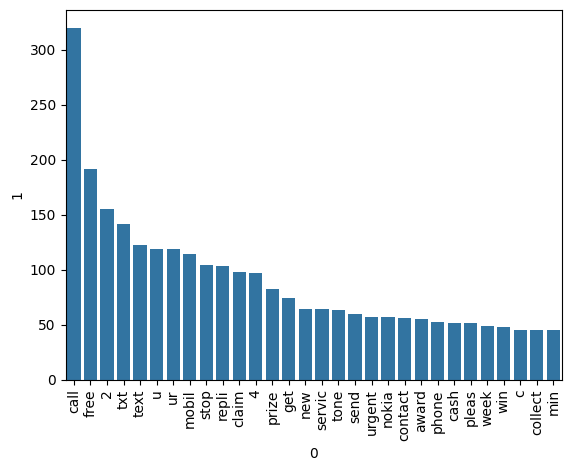

In [ ]:
from collections import Counter
sns.barplot(x =pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
# X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(5163, 6562)

In [ ]:
y = df['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from  sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8625363020329139
[[780 121]
 [ 21 111]]
0.47844827586206895


In [ ]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9632139399806389
[[901   0]
 [ 38  94]]
1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.9690222652468539
[[897   4]
 [ 28 104]]
0.9629629629629629


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl','wb'))